In [1]:
%matplotlib inline
from nilearn import plotting, image
import os
import shutil
import matplotlib.pylab as plt
import nibabel as nb
import numpy as np
from niworkflows_tmp import plot_registration, cuts_from_bbox, robust_set_limits

In [2]:
#sub="/Applications/freesurfer/subjects/fsaverage5/"
sub = "/Users/franzliem/Desktop/ds114_test1_freesurfer_precomp_v6.0.0/sub-01/"

brain = sub + "mri/brain.mgz"
aseg = sub + "mri/aseg.mgz"
ribbon = sub + "mri/ribbon.mgz"
brain_img = nb.load(brain)
aseg_img = nb.load(aseg)
ribbon_img = nb.load(ribbon)

hemis = ["lh", "rh"]
hemi_full = {"lh":"left", "rh":"right"}

# parcellation

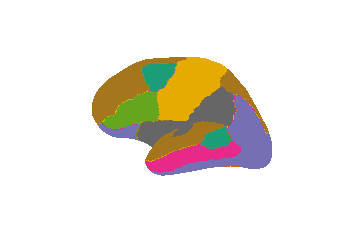

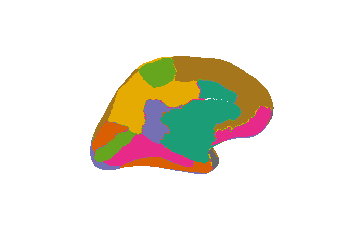

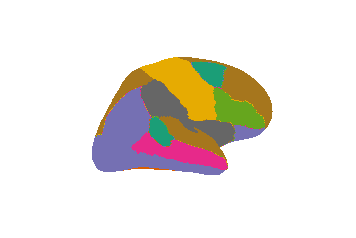

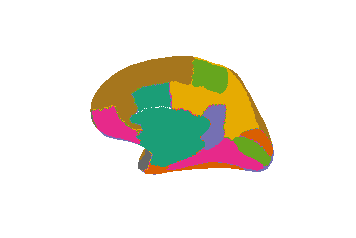

In [3]:
for hemi in hemis:
    surf = os.path.join(sub, "surf/{hemi}.inflated".format(hemi=hemi))
    annot = os.path.join(sub, "label/{hemi}.aparc.annot".format(hemi=hemi))
    for view in ["lateral", "medial"]:
        plotting.plot_surf(surf, annot, cmap="Dark2", view=view, hemi=hemi_full[hemi],alpha=1);

# segmentation

In [4]:
aseg_data = aseg_img.get_data() % 39
aseg_data_thr = aseg_data.copy()
aseg_data_thr[aseg_data_thr < 5] = 0
subcort = image.new_img_like(aseg_img, aseg_data_thr)

/Users/franzliem/anaconda3/envs/nilearn_dev/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


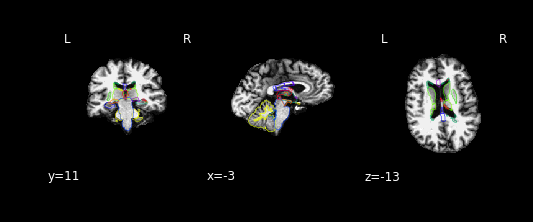

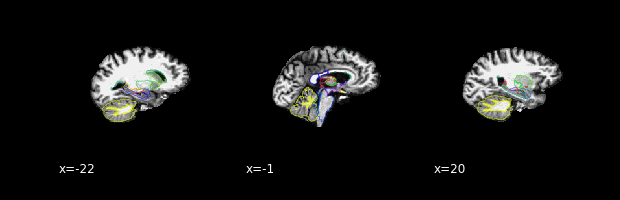

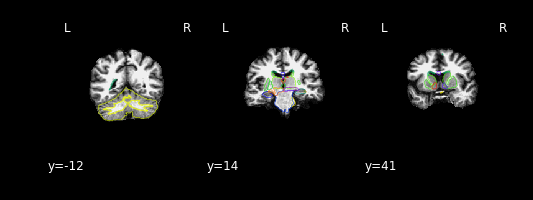

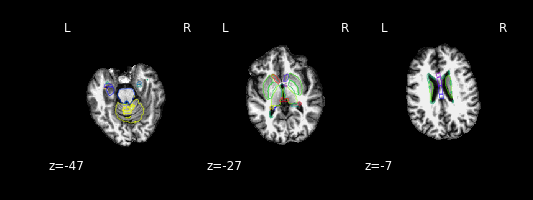

In [5]:
def draw_subcort():
    cm = plt.cm.prism(np.unique(subcort_data))
    kwargs = {'levels': [0.5], 'linewidths': 0.5}
    for c, i in enumerate(np.unique(subcort_data)):
        subcort_data_cp = subcort_data.copy()
        subcort_data_cp[subcort_data!=i] = 0
        subcort_sel = image.new_img_like(subcort, subcort_data_cp)
        d.add_contours(subcort_sel, colors=[cm[c]], **kwargs)

        
plot_params = robust_set_limits(brain_img.get_data().reshape(-1), {})

subcort_data = subcort.get_data()
d = plotting.plot_anat(brain, draw_cross=False, **plot_params)
draw_subcort()
d.savefig("/Users/franzliem/Desktop/subcort.pdf")


cuts = cuts_from_bbox(aseg_img, cuts=5)
for di in ("x", "y", "z"):
    d = plotting.plot_anat(brain, display_mode=di, cut_coords=cuts[di][1:-1], **plot_params)
    draw_subcort()
    d.savefig("/Users/franzliem/Desktop/subcort_{}.pdf".format(di))




# surfs

In [6]:
contour = nb.load(ribbon)
contour_data = contour.get_data() % 39

/Users/franzliem/anaconda3/envs/nilearn_dev/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(None,)

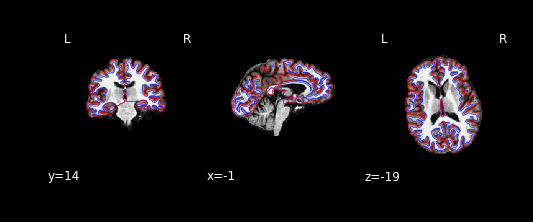

In [7]:
cuts = cuts_from_bbox(contour, cuts=1)
plot_registration(brain_img, '',
                  estimate_brightness=True,
                  order=["ortho"],
                  cuts={"ortho": (*cuts["x"], *cuts["y"], *cuts["z"])},
                  plot_params={"draw_cross": False},
                  contour=contour,
                  compress=True),

(None,)

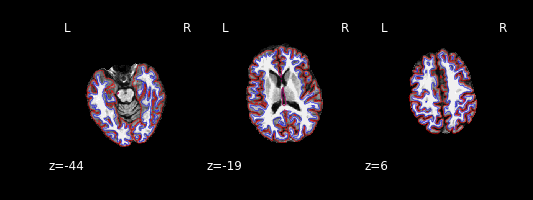

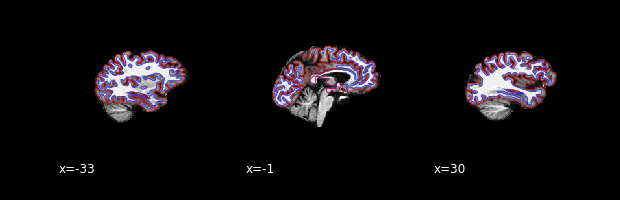

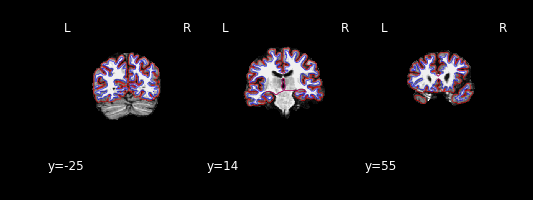

In [8]:
cuts = cuts_from_bbox(contour, cuts=3)
plot_registration(brain_img, '',
                  estimate_brightness=True,
                  cuts=cuts,
                  contour=contour,
                  compress=True),

(None,)

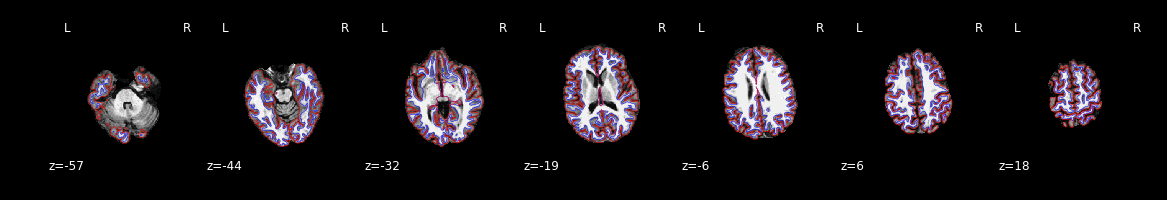

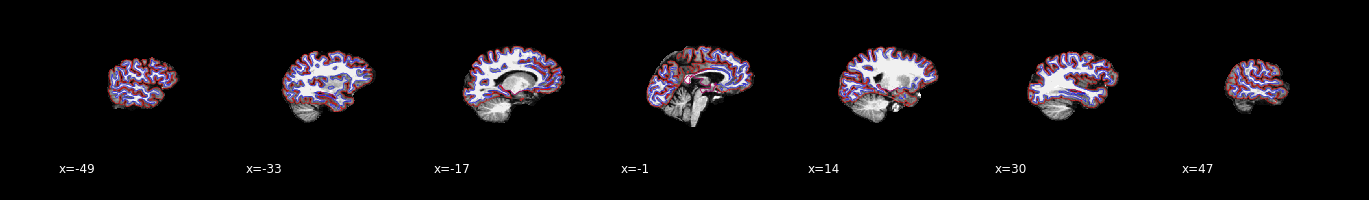

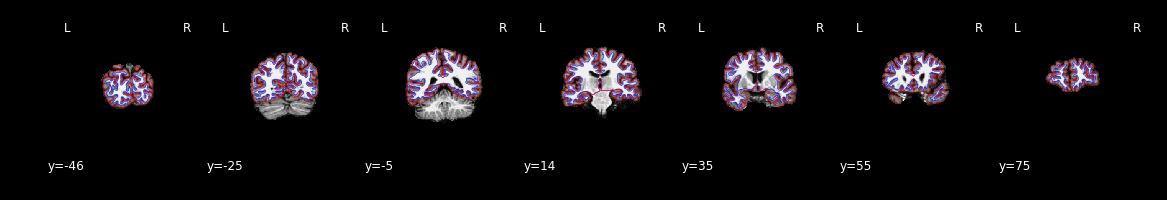

In [9]:
cuts = cuts_from_bbox(contour, cuts=7)
plot_registration(brain_img, '',
                  estimate_brightness=True,
                  cuts=cuts,
                  contour=contour,
                  compress=True),